# Image manipulator notebook

Example of possible datapipeline that would work during training but also during runs of the model

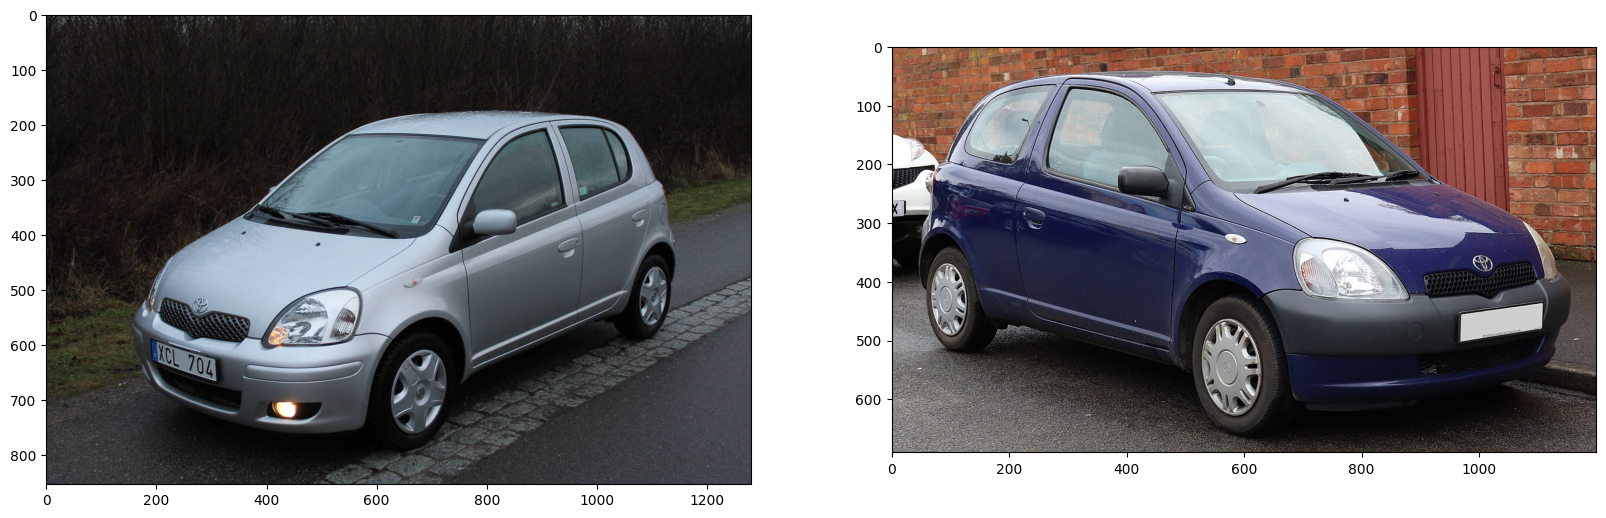

In [15]:
import cv2
import os
import matplotlib.pyplot as plt

def read_images_from_folder(foldername) -> list:
    images = []
    for filename in os.listdir(foldername):
        img = cv2.imread(os.path.join(foldername, filename))
        if img is not None:
            images.append(img)
    return images

def plot_imglist_linearly(imglist: list): 
    l = len(imglist)
    fig, ax = plt.subplots(1, l, figsize=(20,10))
    for i, img in enumerate(imglist):
        RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i].imshow(RGB_im)
    

foldername = './yaris_img'
images_list = read_images_from_folder(foldername)
plot_imglist_linearly(images_list)

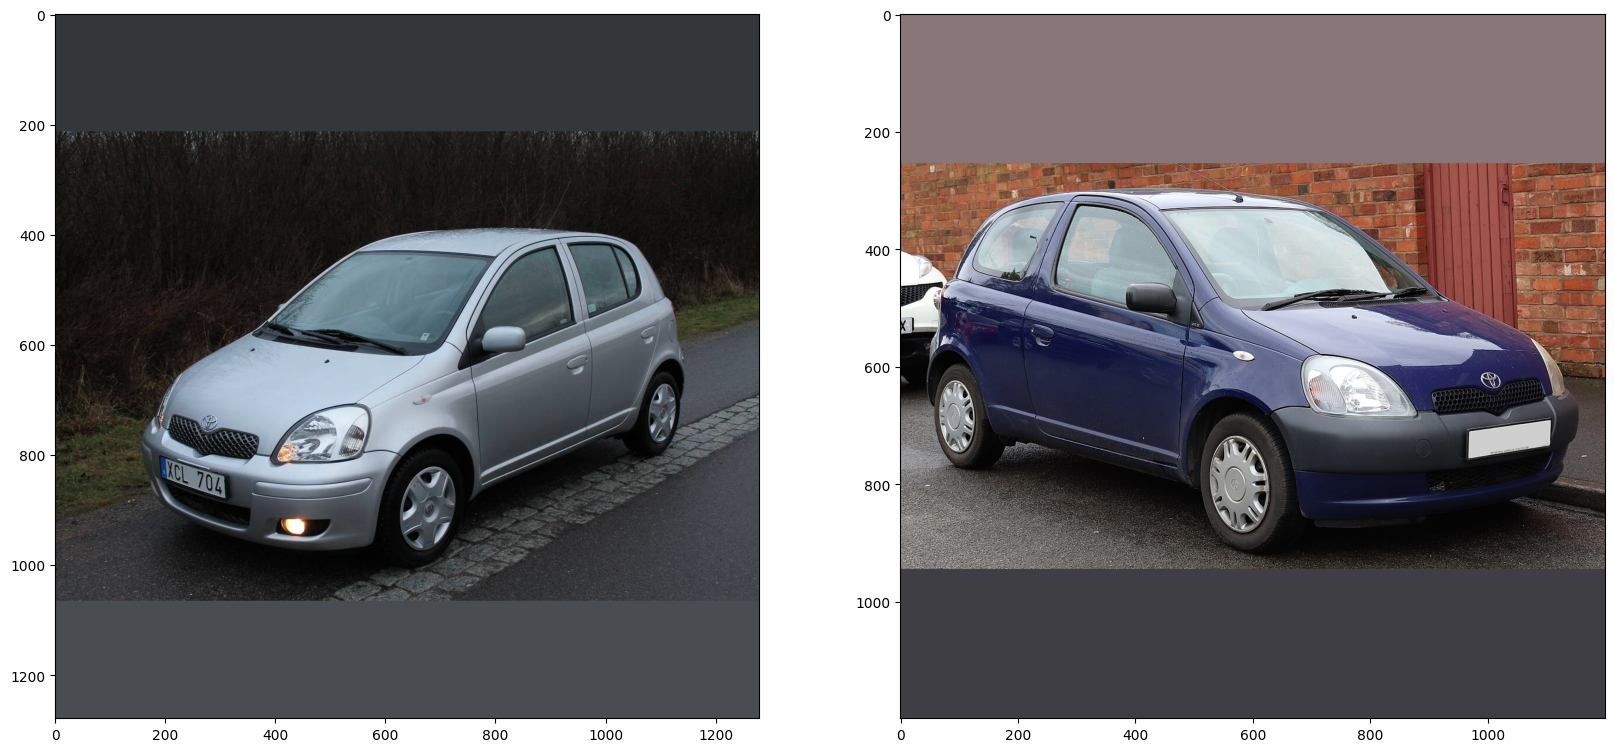

In [16]:
def image_squarer(img: cv2.typing.MatLike):
    # Calculate the difference to make the image square
    height_diff = img.shape[1] - img.shape[0]
    padding = abs(height_diff) // 2

    # Add padding to the top and bottom if height is less than width
    if height_diff > 0:
        # Calculate the mean color value of the top half and bottom half of the image
        mean_color_top = img[:img.shape[0]//2, :, :].mean(axis=(0, 1)).astype(int).tolist()
        mean_color_bottom = img[img.shape[0]//2:, :, :].mean(axis=(0, 1)).astype(int).tolist()
        padded_img = cv2.copyMakeBorder(img, padding,0, 0, 0, cv2.BORDER_CONSTANT, value=mean_color_top)
        padded_img = cv2.copyMakeBorder(padded_img, 0, padding, 0, 0, cv2.BORDER_CONSTANT, value=mean_color_bottom)
    
    # if width is less than height add padding to sides
    elif height_diff < 0:
        mean_color_left = img[:, :img.shape[1]//2, :].mean(axis=(0, 1)).astype(int).tolist()
        mean_color_right = img[:, img.shape[1]//2:, :].mean(axis=(0, 1)).astype(int).tolist()
        padded_img = cv2.copyMakeBorder(img, 0,0, padding, 0, cv2.BORDER_CONSTANT, value=mean_color_left)
        padded_img = cv2.copyMakeBorder(padded_img, 0, 0, 0, padding, cv2.BORDER_CONSTANT, value=mean_color_right)

    elif height_diff == 0: # if no do nothing
        padded_img = img
    return padded_img

padd_imgs = [image_squarer(img) for img in images_list]
# Convert the padded image to RGB and display it
plot_imglist_linearly(padd_imgs)

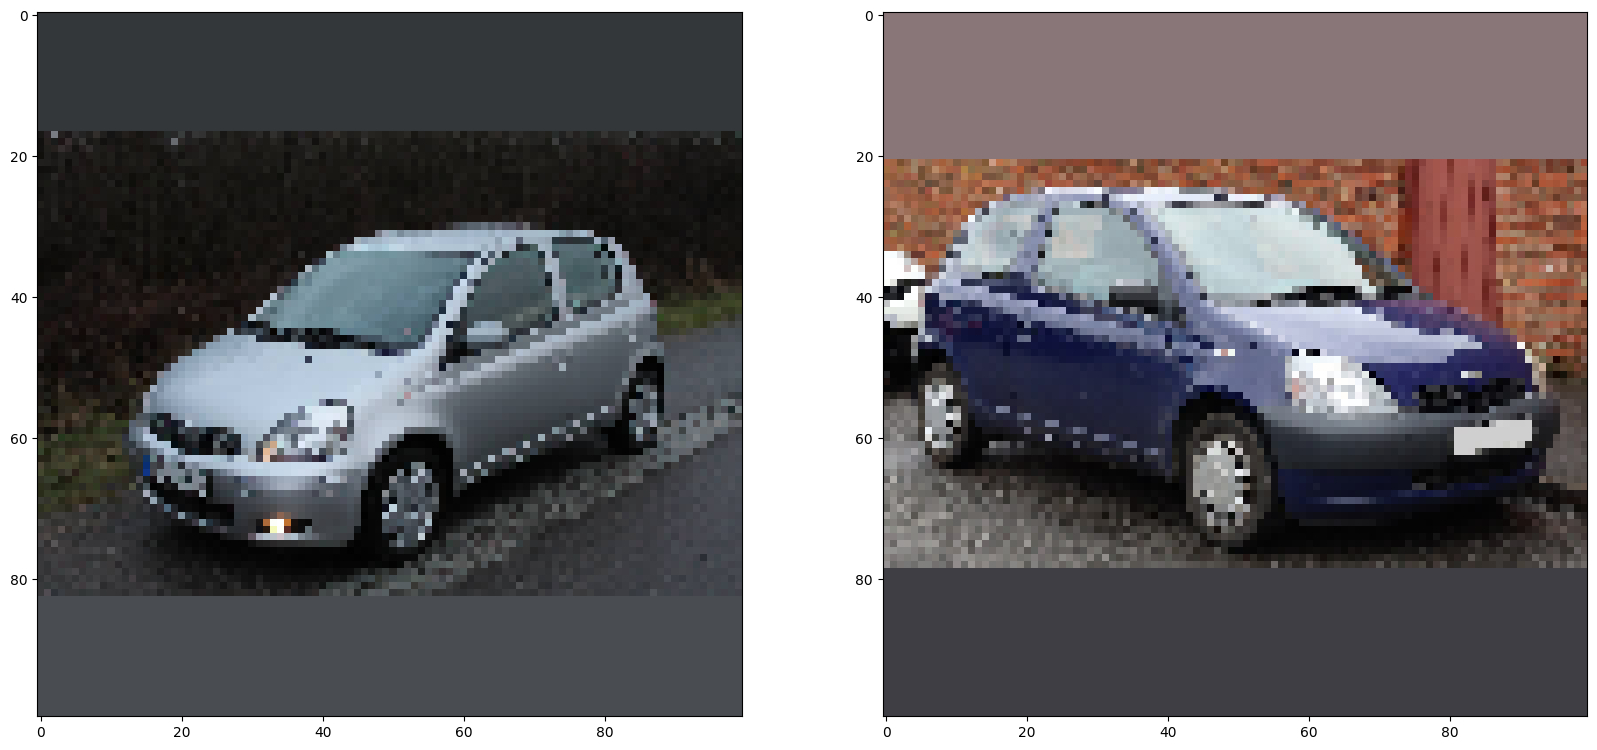

In [18]:
def resizer(width: int, height: int, img: cv2.typing.MatLike) -> cv2.typing.MatLike:
    return cv2.resize(src = img, dsize=(width, height))

resized_list = [resizer(100,100,img) for img in padd_imgs]
plot_imglist_linearly(resized_list)